In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import os

In [2]:
# Get the current directory
current_dir = os.getcwd()
# Construct the relative file path based on the current directory
folder_path_instances = os.path.join(current_dir, 'Data', 'Instances', 'Warmsen')

# Read the CSV file using the relative file path
pobj_warmsen = pd.read_csv(folder_path_instances + '/post_order_id_mapping.dat', sep='\t', names=('PostObjectId', 'RoutePosID'))
ppoint_warmsen = pd.read_csv(folder_path_instances + '/post_point_information.dat', sep='\t', names=('PostPointId', 'PostObjectId'))

In [3]:
# Convert 'PostObjectId' column from string to list
ppoint_warmsen['PostObjectId'] = ppoint_warmsen['PostObjectId'].apply(literal_eval)

# Use explode() to split the "PostObjectId" column into different rows
ppoint_warmsen = ppoint_warmsen.explode('PostObjectId', ignore_index=True)
print(ppoint_warmsen.head(10))

   PostPointId PostObjectId
0            0            0
1            0          113
2            1            1
3            2            2
4            3            3
5            4            4
6            5            5
7            6            6
8            7            7
9            8            8


In [4]:
# Merge post_order_id_mapping.dat and post_point_information.dat using 'RoutePosID' as the common column
merged_data = pd.merge(ppoint_warmsen, pobj_warmsen, on='PostObjectId', how = 'outer')
print(merged_data.head(10))

   PostPointId PostObjectId                        RoutePosID
0            0            0                               NaN
1            0          113  8EF65E046B44CD28F98B943FAF4E10C0
2            1            1                               NaN
3            2            2                               NaN
4            3            3                               NaN
5            4            4                               NaN
6            5            5                               NaN
7            6            6                               NaN
8            7            7                               NaN
9            8            8                               NaN


In [5]:
# Define a list of file paths for multiple data sets
folder_path_volumes = os.path.join(current_dir, 'Data', 'Volumes')
dfs = []

for file_name in os.listdir(folder_path_volumes):
    if file_name.endswith('.csv'): # Check if the file has .csv extension
        file_path = os.path.join(folder_path_volumes, file_name) # Create full file
        df = pd.read_csv(file_path, sep=';')
        df = df.rename(columns={'ROUTEPOS_ID': 'RoutePosID',
                                'BRIEFE': 'Letters',
                                'PAKETE': 'Packets',
                                'SONSTIGE': 'Others'})

        day = file_path[-6:-4]
        df['Days'] = day
        dfs.append(df)

volumes_dp = pd.concat(dfs, ignore_index=True)
print(volumes_dp)

                               RoutePosID  Letters  Packets  Others Days
0        61ADE0B658BD7433E040400A0913386C  1.38250  0.16450   0.085   di
1        6F994C12508952C82A3BD63E30AA0606  1.38250  0.16450   0.085   di
2        D6590A6EA73C629B096242214AB6FA85  1.38250  0.16450   0.085   di
3        00F6207EED20EAE0E040007F01000C8B  0.78375  0.23125   0.100   di
4        30B7851A725D50BBE040400A09130368  0.78375  0.23125   0.100   di
...                                   ...      ...      ...     ...  ...
4527373  F48CB0CD5303117AE030007F0100574C  1.05200  0.27000   0.512   sa
4527374  F48CB0CD5304117AE030007F0100574C  1.05200  0.27000   0.512   sa
4527375  F48CB0CD5305117AE030007F0100574C  1.05200  0.27000   0.512   sa
4527376  F48CB0CD5306117AE030007F0100574C  1.05200  0.27000   0.512   sa
4527377  F48CB0CD5307117AE030007F0100574C  1.05200  0.27000   0.512   sa

[4527378 rows x 5 columns]


In [6]:
#extracting only warmsen data from the volume database
merged_data = pd.merge(merged_data, volumes_dp, on='RoutePosID', how='left')
print(merged_data.head(10))

   PostPointId PostObjectId                        RoutePosID   Letters  \
0            0            0                               NaN       NaN   
1            0          113  8EF65E046B44CD28F98B943FAF4E10C0  0.926250   
2            0          113  8EF65E046B44CD28F98B943FAF4E10C0  1.276250   
3            0          113  8EF65E046B44CD28F98B943FAF4E10C0  1.147500   
4            0          113  8EF65E046B44CD28F98B943FAF4E10C0  1.174375   
5            0          113  8EF65E046B44CD28F98B943FAF4E10C0  0.196250   
6            0          113  8EF65E046B44CD28F98B943FAF4E10C0  1.051250   
7            1            1                               NaN       NaN   
8            2            2                               NaN       NaN   
9            3            3                               NaN       NaN   

    Packets    Others Days  
0       NaN       NaN  NaN  
1  0.187500  0.326250   di  
2  0.163750  0.190000   do  
3  0.143125  0.498125   fr  
4  0.211250  0.347500   mi  


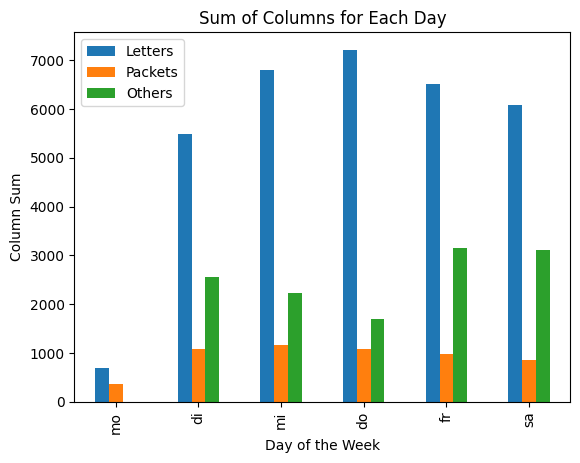

In [7]:
desired_order = ['mo', 'di', 'mi', 'do', 'fr', 'sa']
# Group the combined dataframe by day of the week and calculate the sum for multiple columns
column_sum_df = merged_data.groupby('Days')[['Letters', 'Packets', 'Others']].sum()
column_sum_df = column_sum_df.reindex(desired_order)
# Plot the column sum dataframe in a bar graph
column_sum_df.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Sum of Columns for Each Day')
plt.xlabel('Day of the Week')
plt.ylabel('Column Sum')

# Show the plot
plt.show()

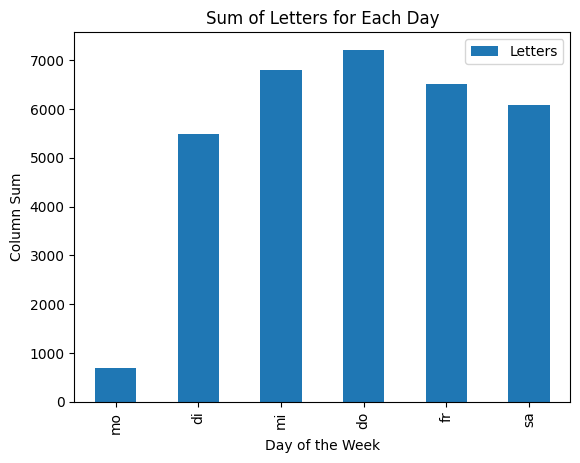

In [8]:
desired_order = ['mo', 'di', 'mi', 'do', 'fr', 'sa']
# Group the combined dataframe by day of the week and calculate the sum for multiple columns
letters_sum_df = merged_data.groupby('Days')[['Letters']].sum()
letters_sum_df = letters_sum_df.reindex(desired_order)
# Plot the column sum dataframe in a bar graph
letters_sum_df.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Sum of Letters for Each Day')
plt.xlabel('Day of the Week')
plt.ylabel('Column Sum')

# Show the plot
plt.show()

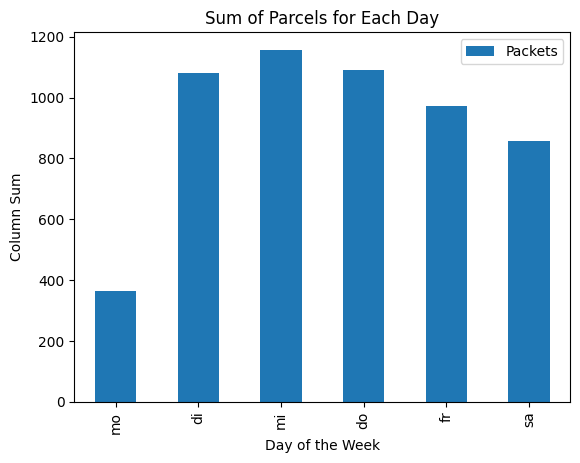

In [10]:
desired_order = ['mo', 'di', 'mi', 'do', 'fr', 'sa']
# Group the combined dataframe by day of the week and calculate the sum for multiple columns
letters_sum_df = merged_data.groupby('Days')[['Packets']].sum()
letters_sum_df = letters_sum_df.reindex(desired_order)
# Plot the column sum dataframe in a bar graph
letters_sum_df.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Sum of Parcels for Each Day')
plt.xlabel('Day of the Week')
plt.ylabel('Column Sum')

# Show the plot
plt.show()

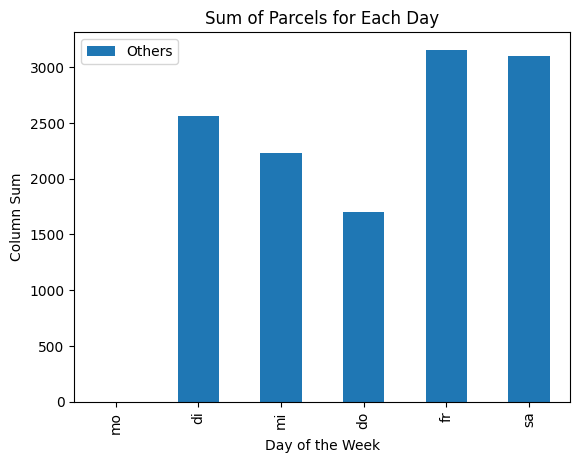

In [11]:
desired_order = ['mo', 'di', 'mi', 'do', 'fr', 'sa']
# Group the combined dataframe by day of the week and calculate the sum for multiple columns
letters_sum_df = merged_data.groupby('Days')[['Others']].sum()
letters_sum_df = letters_sum_df.reindex(desired_order)
# Plot the column sum dataframe in a bar graph
letters_sum_df.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Sum of Parcels for Each Day')
plt.xlabel('Day of the Week')
plt.ylabel('Column Sum')

# Show the plot
plt.show()